In [1]:
from requests import post
from app.analysis import Quote
query = 'query UnknownFile($limit_0:[FundLimitOptionInput!]!) {viewer {...Fe}} fragment Fe on Viewer {_screenFunds4s9d1a:screenFunds(filterCategory:["$$"],limit:$limit_0,first:100) {edges {node {symbol}}}}'
variables = {'limit_0':[{'type':'FUND_TOTAL_ASSETS','min':1000000000,'inclusive':True},{'type':'FUND_NET_EXPENSE_RATIO','max':1,'inclusive':True}]}
r = post('https://lens.m1finance.com/graphql', json={'query': query.replace('$$', 'Industries'), 'variables': variables}).json()
symbols = [n['node']['symbol'] for n in r['data']['viewer']['_screenFunds4s9d1a']['edges']]

In [2]:
quote = Quote(symbols, 50, 10)
f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}'

'from 2019-05-13 to 2019-07-02 - 62'

In [3]:
stat = quote.statistics()
stat = stat[(stat['drawdown'] < 6) & (stat['shrp'] > 0.6)]
stat

,len,mean,std,shrp,drawdown
Symbols,,,,,
XAR,26,2.222909,1.479229,1.449095,2.376372
IHI,26,3.442237,2.363465,1.422857,2.045544
IGF,26,1.761575,1.328342,1.266399,1.751762
IXJ,26,2.059877,1.679462,1.179254,2.668439
XLV,26,2.024758,1.827097,1.064745,2.741251
IYH,26,2.028885,1.909387,1.021019,2.779547
FHLC,26,2.069216,1.951528,1.019637,2.790587
VHT,26,2.056786,1.939741,1.019425,2.877869
FXH,26,2.388048,2.298997,1.004213,2.855186


In [4]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(2)

['XAR'] 0.026179131962780877 0.8 0.475274441318233 1.4490953093554522
['XAR', 'IHI'] -0.3958812320252012 0.5979031332337188 0.4421916276456101 1.4359759929045302


['XAR', 'IHI']

In [8]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(8, ['XAR', 'IHI', 'ITA', 'XLU', 'FBT', 'VPU'], sr=0)

['XAR', 'IHI', 'ITA', 'XLU', 'FBT', 'VPU'] -0.5026807266878138 0.4942443510758662 0.6030749222363201 0.9895462690583354
['XAR', 'IHI', 'ITA', 'XLU', 'FBT', 'VPU', 'IGF'] -0.8786150658328771 0.5544132368050163 0.5669716973621066 1.0290966212879304
['XAR', 'IHI', 'ITA', 'XLU', 'FBT', 'VPU', 'IGF', 'IXJ'] -1.2449270829669574 0.5922617022967509 0.562811214736292 1.0478662913418761
['XAR', 'IHI', 'ITA', 'XLU', 'FBT', 'VPU', 'IGF', 'XLB'] -1.2455776149655153 0.5569217722477061 0.597500612786779 0.998324403537545


['XAR', 'IHI', 'ITA', 'XLU', 'FBT', 'VPU', 'IGF', 'XLB']

In [15]:
quote.setup_mask(['XAR', 'IHI'])
quote.find_optimal_ratio(.8)

({'XAR': 0.5, 'IHI': 0.3}, 2.1403, 1.2925, 1.5945)

Populating the interactive namespace from numpy and matplotlib


,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,26.0,2.540020,1.636524,-1.582808,1.835681,2.759523,3.825006,4.701078,1.503586,1.744398
XAR,26.0,2.222909,1.479229,-1.780440,1.557358,2.145244,3.246400,4.508870,1.449095,2.376372
IHI,26.0,3.442237,2.363465,-0.813703,1.716145,3.446637,5.500932,7.055224,1.422857,2.045544
IGF,26.0,1.761575,1.328342,-0.689806,1.046625,1.699108,2.764560,3.757548,1.266399,1.751762
XLB,26.0,2.961485,3.681250,-4.056015,0.711491,2.291166,5.281412,9.706154,0.782919,4.056015
FBT,26.0,2.107851,2.632990,-3.772593,0.424719,2.686071,3.792187,6.640409,0.770411,3.772593
XLU,26.0,1.149709,1.633354,-1.157674,-0.202006,0.689521,2.513176,4.394851,0.655305,3.237646


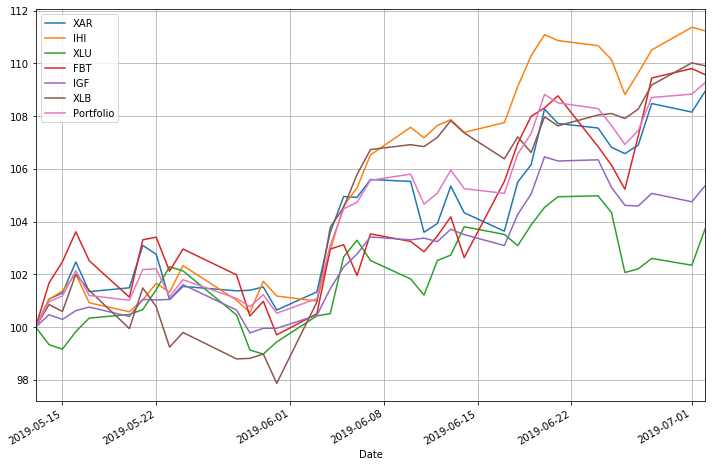

In [16]:
%pylab inline
quote.setup_mask(['XAR', 'IHI', 'XLU', 'FBT', 'IGF', 'XLB'])
quote.graph({'XLB': .05, 'FBT': 0.05, 'IGF': 0.05, 'XLU': 0.05, 'IHI': 0.3, 'XAR': 0.5})